# Sparse Hebbian Learning: basics of coding

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.

Here, we will show the basic operations that are implemented in this package. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [3]:
tag = 'coding'
homeo_methods = ['None', 'HEH']
homeo_methods = ['None', 'HAP']
homeo_methods = ['None', 'HAP', 'HEH']

record_num_batches = 2**12

seed = 42
np.random.seed(seed)

In [4]:
from shl_scripts.shl_experiments import SHL
shl = SHL()
data = shl.get_data(matname=tag + '_test')
indx = np.random.permutation(data.shape[0])[:record_num_batches]

In [5]:
!ls -l {shl.cache_dir}/{tag}*

-rw-r--r--  1 laurentperrinet  staff    3233883 Sep 17 13:25 cache_dir/coding_HAP_dico.pkl
-rw-r--r--  1 laurentperrinet  staff    3233883 Sep 17 13:32 cache_dir/coding_HEH_dico.pkl
-rw-r--r--  1 laurentperrinet  staff    3233884 Sep 17 13:20 cache_dir/coding_None_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  102735488 Sep 17 17:22 cache_dir/coding_data.npy
-rw-r--r--  1 laurentperrinet  staff  102735488 Sep 17 13:14 cache_dir/coding_test_data.npy


In [6]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean(), ' +/- ', data.mean(axis=1).std())
SE = np.sqrt(np.mean(data**2, axis=1))
print('average energy of data = ', SE.mean(), '+/-', SE.std())

number of patches, size of patches =  (65520, 196)
average of patches =  5.405735690906172e-19  +/-  0.013110254820018232
average energy of data =  0.3172050403807932 +/- 0.09030859334891046


## learning

The actual learning is done in a second object (here ``dico``) from which we can access another set of properties and functions  (see the [shl_learn.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_learn.py) script):

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶None🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 196)
average of filters =  -2.2453495398077385e-05 +/- 0.0027823779650573656
average energy of filters =  1.0 +/- 8.783052447154673e-17


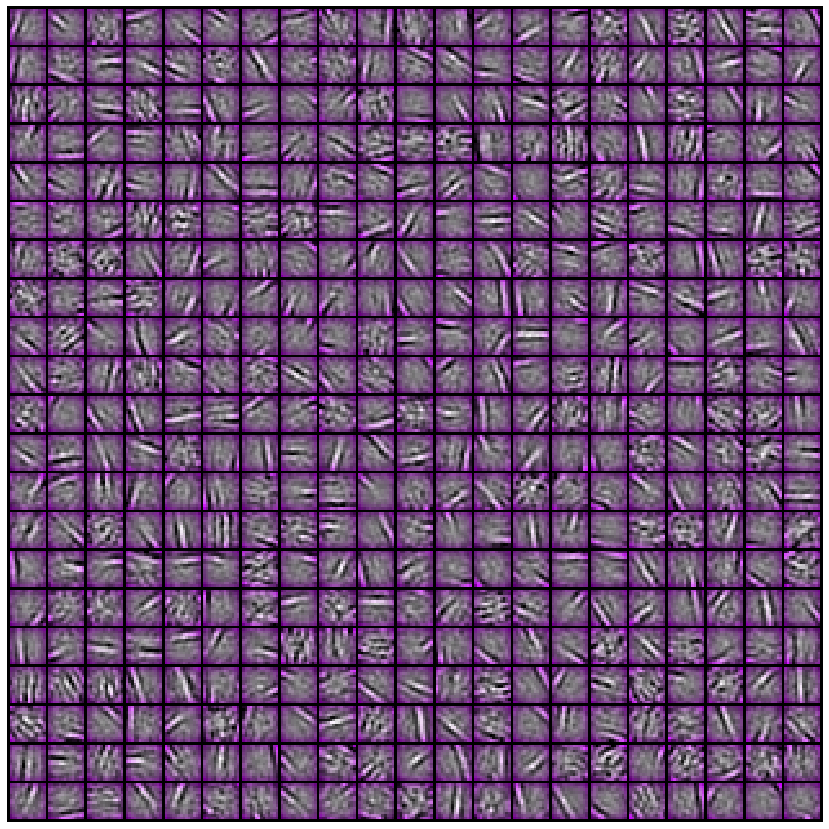

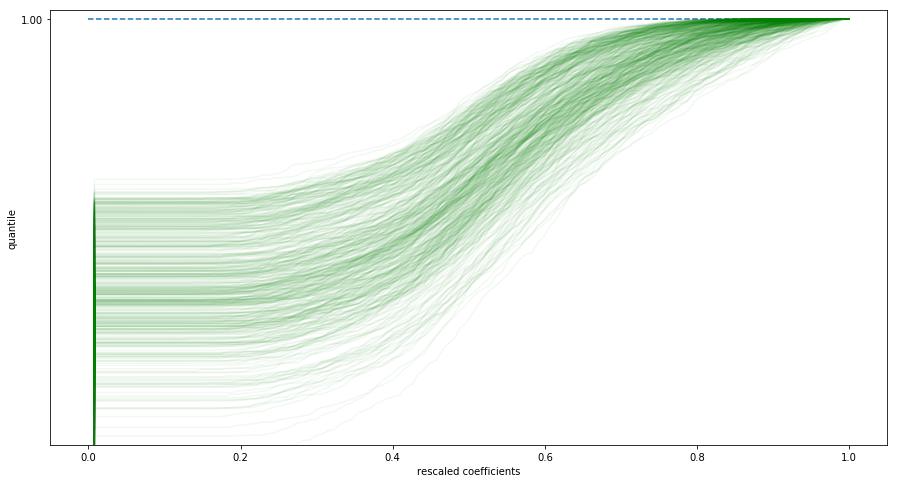

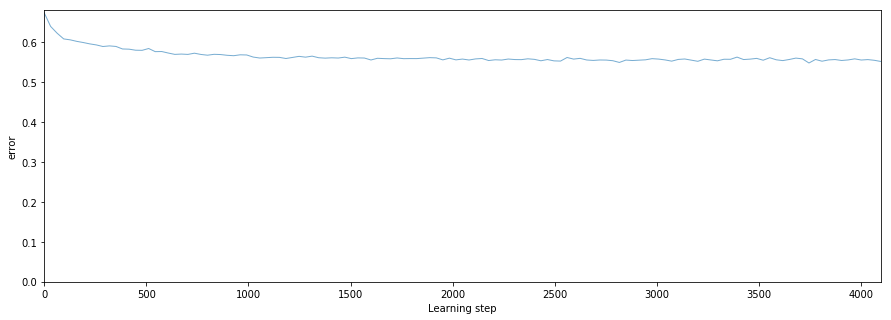

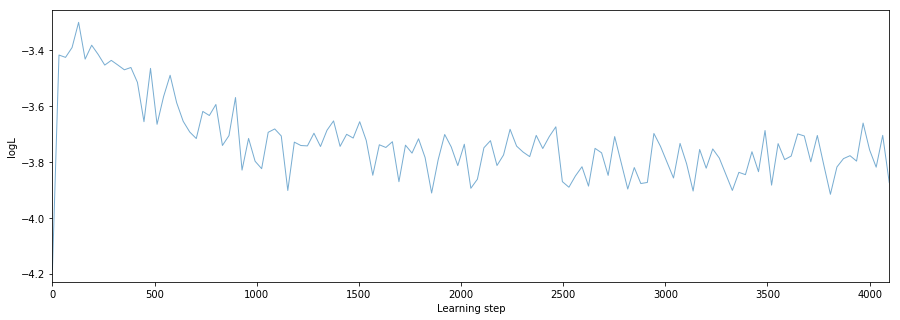

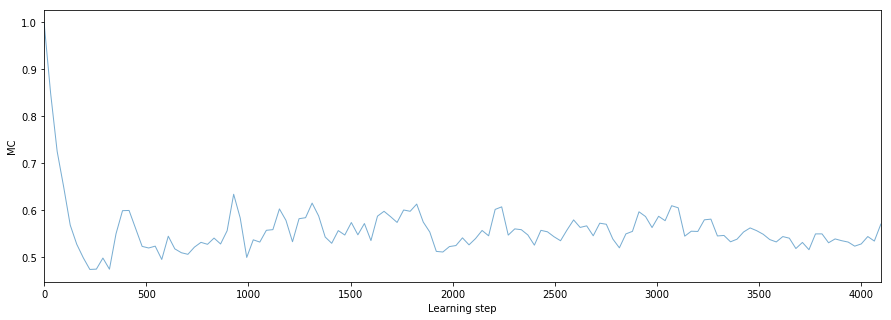

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 196)
average of filters =  9.685532721322e-06 +/- 0.002690764244950258
average energy of filters =  1.0 +/- 9.293304660869156e-17


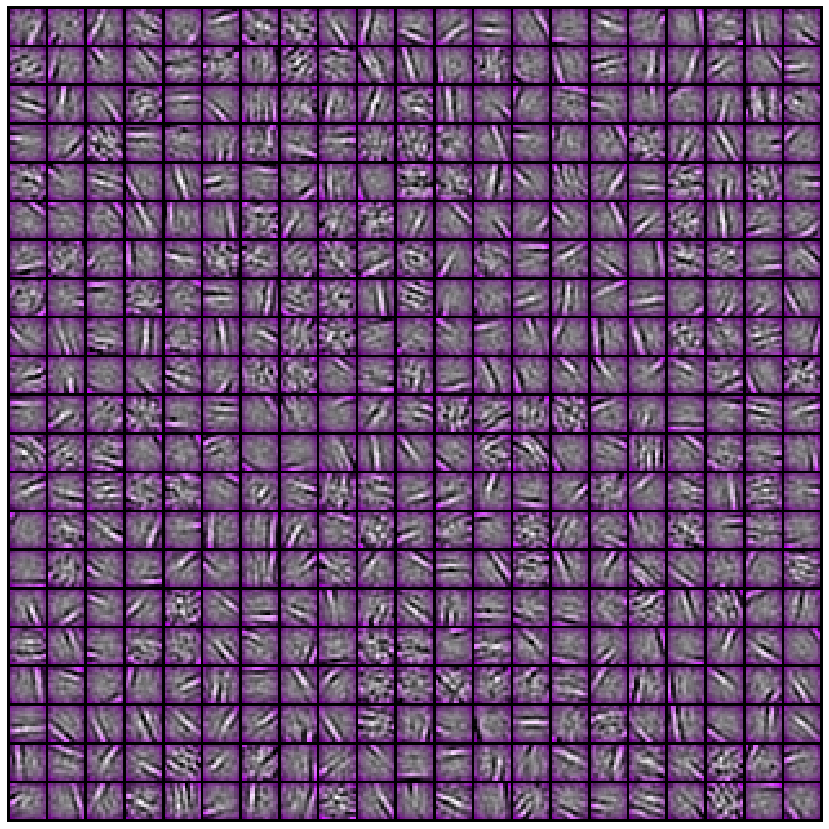

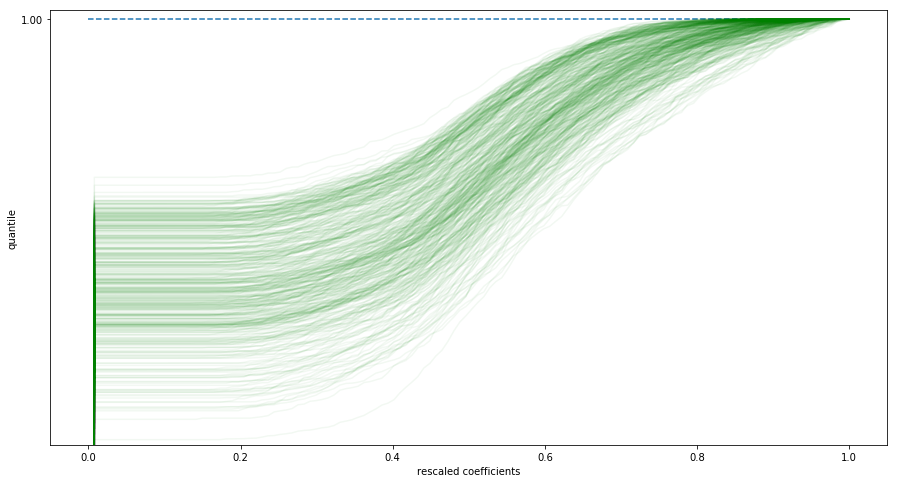

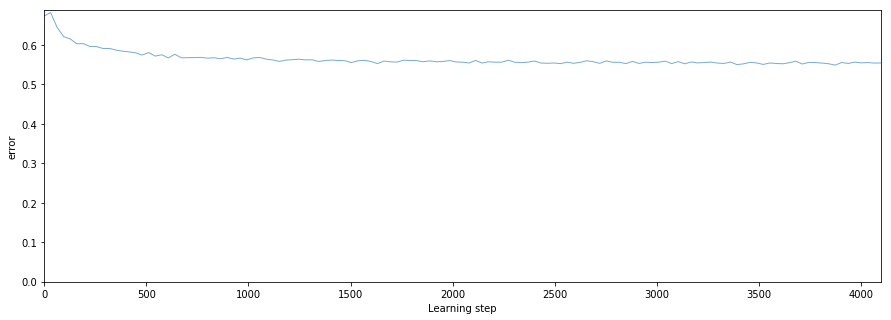

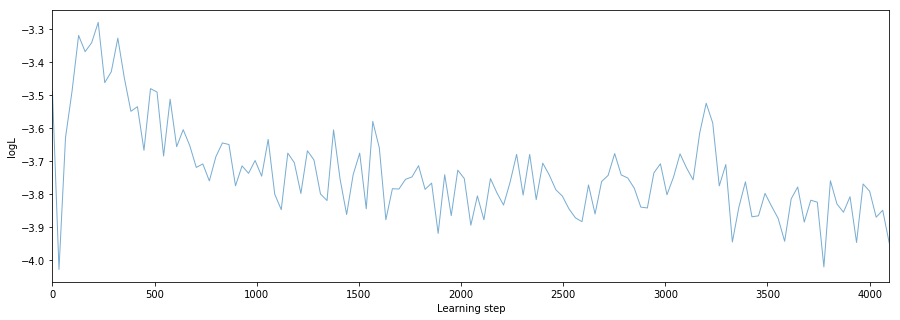

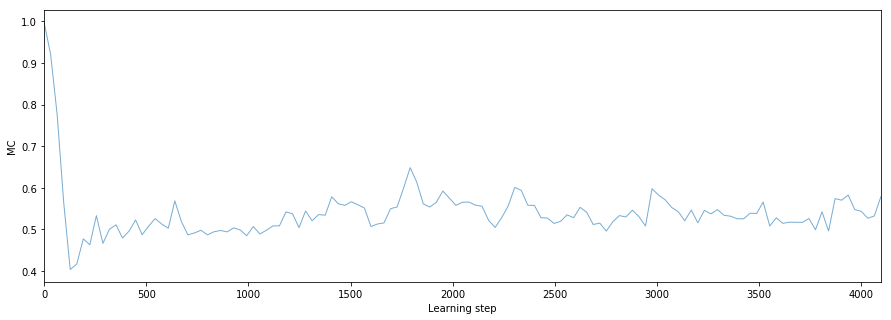

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 196)
average of filters =  0.0001217363006599634 +/- 0.0026672341367003378
average energy of filters =  1.0 +/- 8.6062483045391e-17


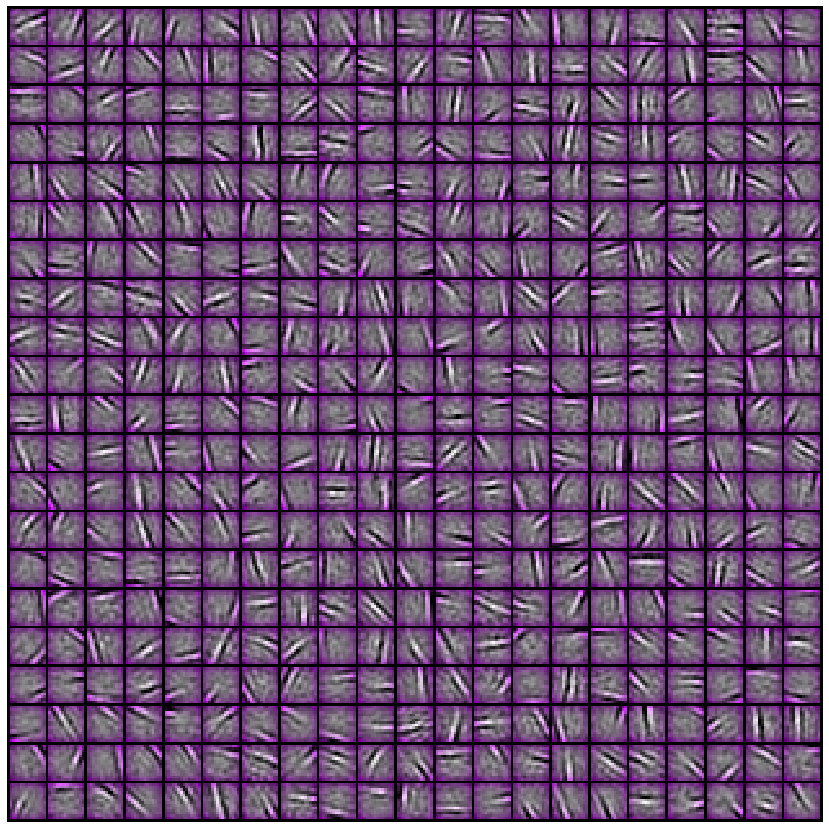

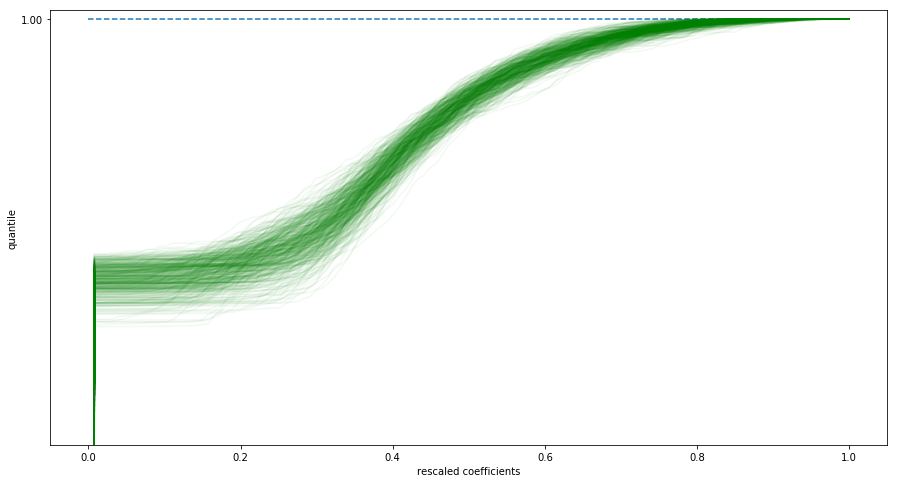

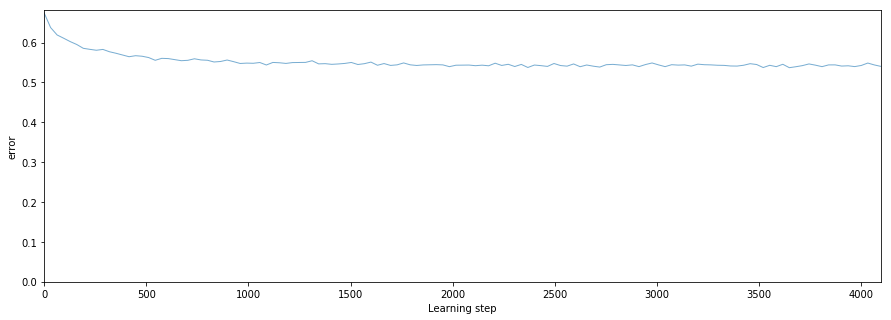

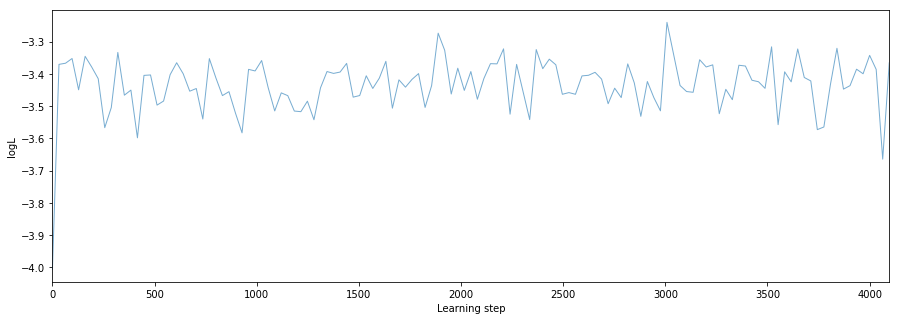

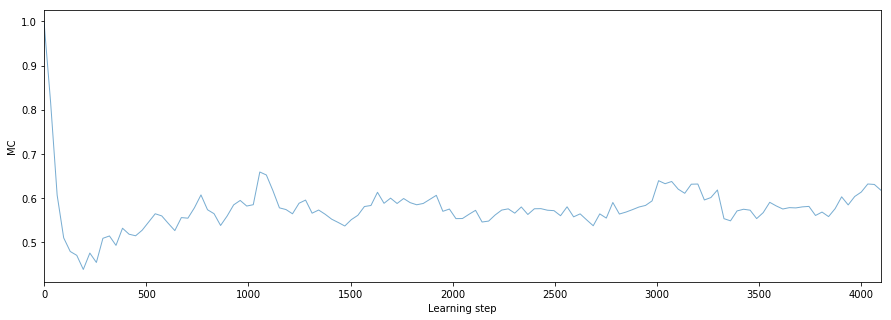

In [7]:
list_figures = ['show_dico', 'time_plot_error', 'time_plot_logL', 'time_plot_MC', 'show_Pcum']

dico = {}
for homeo_method in homeo_methods:
    print(42*'🐶')
    print(19*'🐶' + homeo_method + 19*'🐶')
    print(42*'🐶')
    shl = SHL(homeo_method=homeo_method)
    dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method)

    print('size of dictionary = (number of filters, size of imagelets) = ', dico[homeo_method].dictionary.shape)
    print('average of filters = ',  dico[homeo_method].dictionary.mean(axis=1).mean(), 
          '+/-',  dico[homeo_method].dictionary.mean(axis=1).std())
    SE = np.sqrt(np.sum(dico[homeo_method].dictionary**2, axis=1))
    print('average energy of filters = ', SE.mean(), '+/-', SE.std())
    plt.show()

## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶Non🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.032230699748229195
average std of codewords =  0.20067922610910463
l0-sparseness of codewords =  0.03155614459325397
std of the average of individual patches =  0.016339663561652815


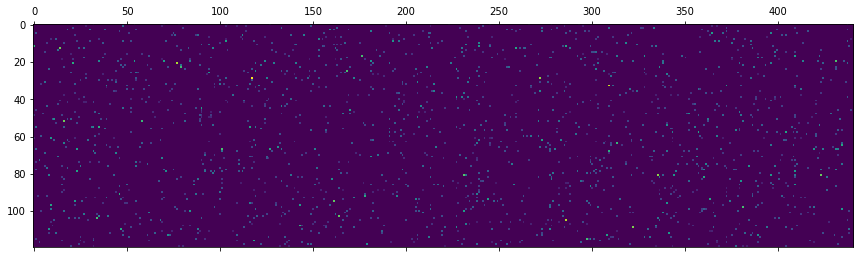

<Figure size 1080x216 with 0 Axes>

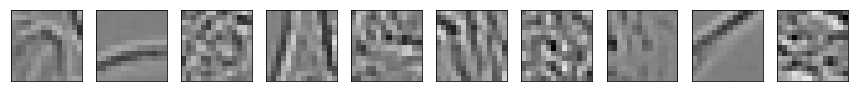

number of codes, size of reconstructed images =  (4096, 196)


<Figure size 1080x216 with 0 Axes>

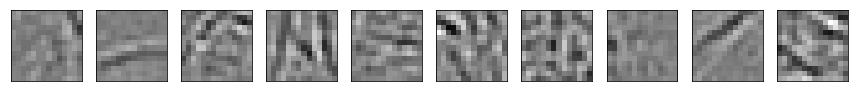

<Figure size 1080x216 with 0 Axes>

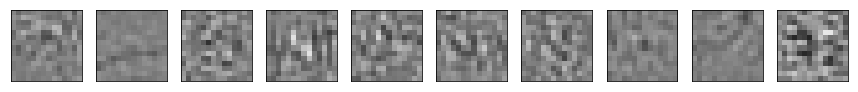

average of data patches =  0.0001237397515007386 +/- 0.01327537223430885
average of residual patches =  0.00022611600000153542 +/- 0.009963634206726218
median energy of data =  0.3230099078248668
average energy of data =  0.318417503293155 +/- 0.08952987767735905
average error =  0.00022611600000153542 +/- 0.2304980150969737
average energy of residual =  0.22027412507255656 +/- 0.06788737670296215
median energy of residual =  0.22330880260985408
average gain of coding =  1.4697395932960946 +/- 0.19303393783650866
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.032096773561710965
average std of codewords =  0.19961198513046519
l0-sparseness of codewords =  0.03158161050878685
std of the average of individual patches =  0.016339366447104424


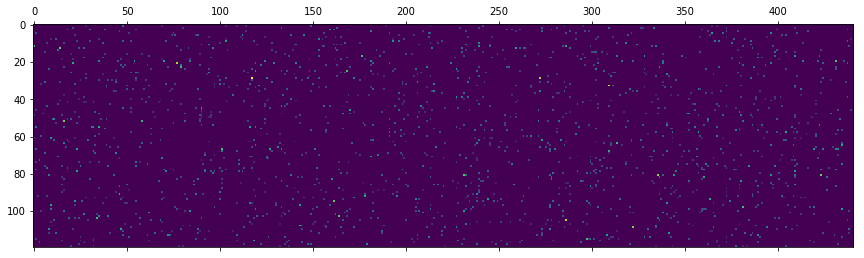

<Figure size 1080x216 with 0 Axes>

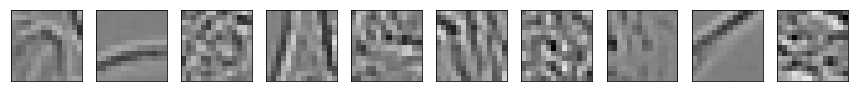

number of codes, size of reconstructed images =  (4096, 196)


<Figure size 1080x216 with 0 Axes>

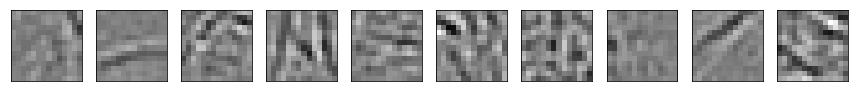

<Figure size 1080x216 with 0 Axes>

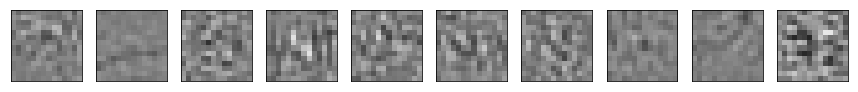

average of data patches =  0.0001237397515007386 +/- 0.01327537223430885
average of residual patches =  0.00026375324250607667 +/- 0.009885642228250958
median energy of data =  0.3230099078248668
average energy of data =  0.318417503293155 +/- 0.08952987767735905
average error =  0.00026375324250607667 +/- 0.22839904041173828
average energy of residual =  0.21848910242210146 +/- 0.06654850373644974
median energy of residual =  0.22253420501056287
average gain of coding =  1.480034052559946 +/- 0.19064591596260708
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.009199529802372722
average std of codewords =  0.08706791944471418
l0-sparseness of codewords =  0.0210226668792517
std of the average of individual patches =  0.039220148087561364


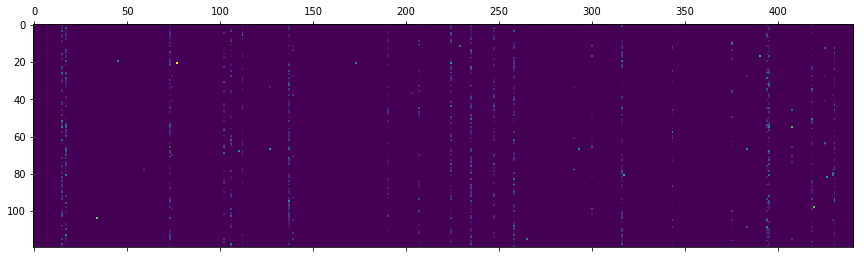

<Figure size 1080x216 with 0 Axes>

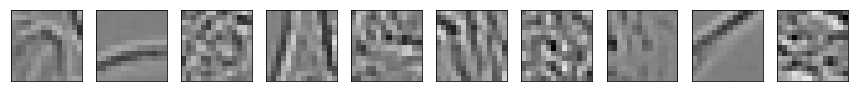

number of codes, size of reconstructed images =  (4096, 196)


<Figure size 1080x216 with 0 Axes>

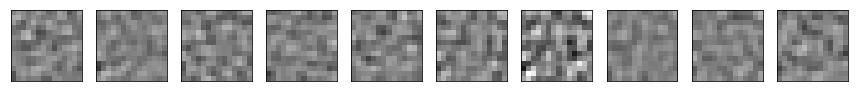

<Figure size 1080x216 with 0 Axes>

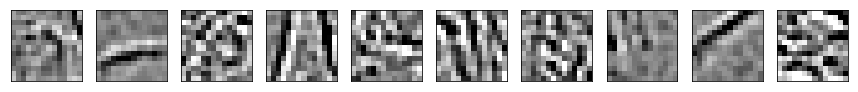

average of data patches =  0.0001237397515007386 +/- 0.01327537223430885
average of residual patches =  0.0013723403684577245 +/- 0.012382651067795755
median energy of data =  0.3230099078248668
average energy of data =  0.318417503293155 +/- 0.08952987767735905
average error =  0.0013723403684577245 +/- 0.31691725668957266
average energy of residual =  0.3056350160276621 +/- 0.08381925723544735
median energy of residual =  0.31133063089139745
average gain of coding =  1.0412594818668246 +/- 0.054379968808883544
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.032200346212467715
average std of codewords =  0.20102520782756944
l0-sparseness of codewords =  0.031529571464002266
std of the average of individual patches =  0.01620838130090277


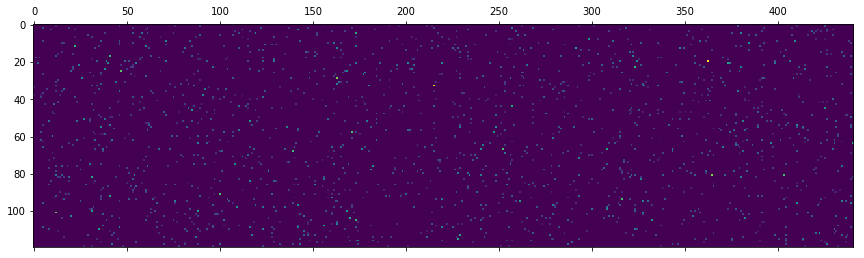

<Figure size 1080x216 with 0 Axes>

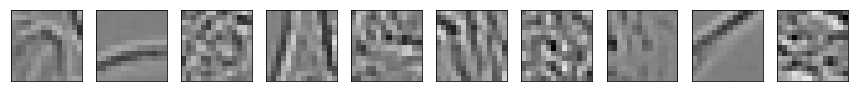

number of codes, size of reconstructed images =  (4096, 196)


<Figure size 1080x216 with 0 Axes>

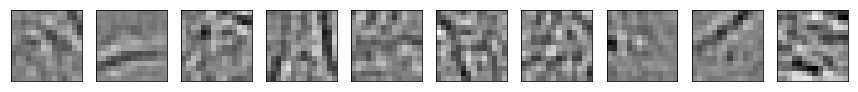

<Figure size 1080x216 with 0 Axes>

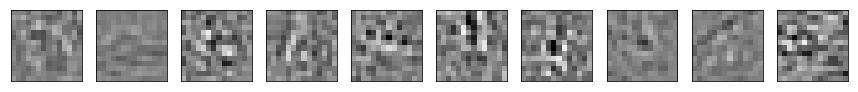

average of data patches =  0.0001237397515007386 +/- 0.01327537223430885
average of residual patches =  1.921833408732949e-05 +/- 0.01008835650495196
median energy of data =  0.3230099078248668
average energy of data =  0.318417503293155 +/- 0.08952987767735905
average error =  1.921833408732949e-05 +/- 0.22952174518737073
average energy of residual =  0.21926521876910796 +/- 0.06784538098747701
median energy of residual =  0.22265689107980885
average gain of coding =  1.4758563118003187 +/- 0.18782464956732736
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.03203092468601044
average std of codewords =  0.19960550274944033
l0-sparseness of codewords =  0.031569984764739226
std of the average of individual patches =  0.016106918846171256


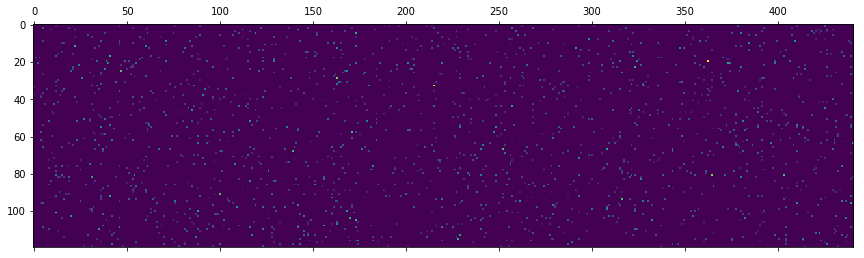

<Figure size 1080x216 with 0 Axes>

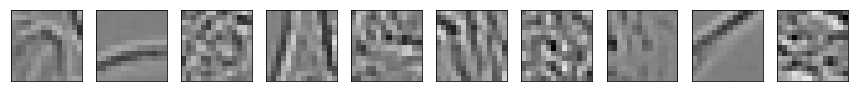

number of codes, size of reconstructed images =  (4096, 196)


<Figure size 1080x216 with 0 Axes>

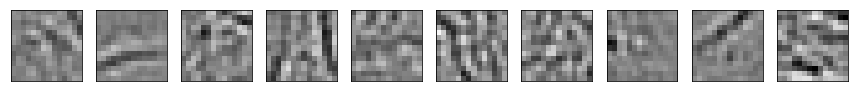

<Figure size 1080x216 with 0 Axes>

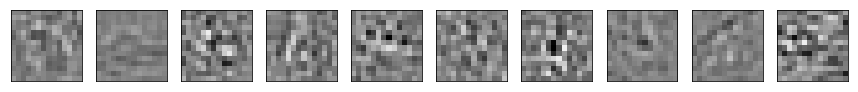

average of data patches =  0.0001237397515007386 +/- 0.01327537223430885
average of residual patches =  2.101424261673913e-05 +/- 0.010076135118236594
median energy of data =  0.3230099078248668
average energy of data =  0.318417503293155 +/- 0.08952987767735905
average error =  2.101424261673913e-05 +/- 0.22714865690832153
average energy of residual =  0.21720774428150474 +/- 0.06646283623945952
median energy of residual =  0.22145103288799645
average gain of coding =  1.4879765407268715 +/- 0.18320609682822306
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.009915287041241835
average std of codewords =  0.0917478165292996
l0-sparseness of codewords =  0.022121022888321996
std of the average of individual patches =  0.03972543464956216


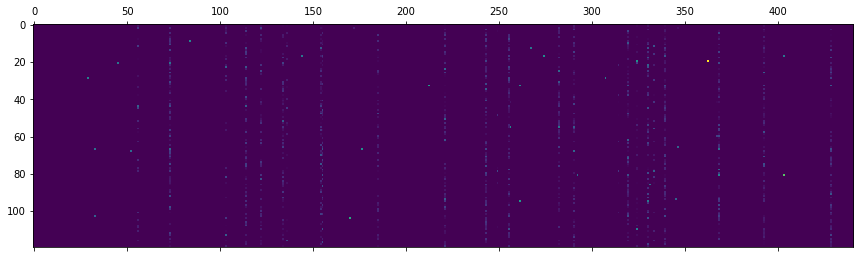

<Figure size 1080x216 with 0 Axes>

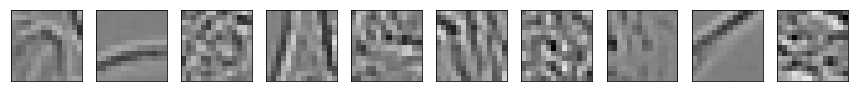

number of codes, size of reconstructed images =  (4096, 196)


<Figure size 1080x216 with 0 Axes>

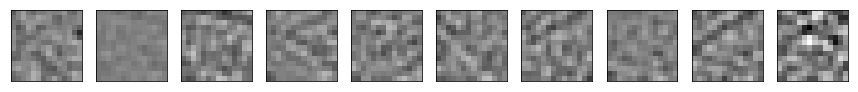

<Figure size 1080x216 with 0 Axes>

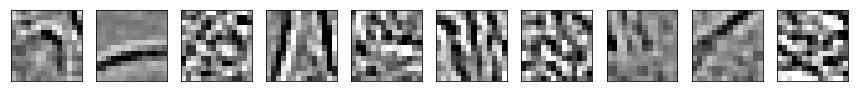

average of data patches =  0.0001237397515007386 +/- 0.01327537223430885
average of residual patches =  -0.0040988881694192306 +/- 0.012448400913671732
median energy of data =  0.3230099078248668
average energy of data =  0.318417503293155 +/- 0.08952987767735905
average error =  -0.0040988881694192306 +/- 0.3148800993344882
average energy of residual =  0.3037779703251118 +/- 0.08297724137544027
median energy of residual =  0.3100760041730738
average gain of coding =  1.0473407580185974 +/- 0.05759612027399702
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.03326659636262188
average std of codewords =  0.2071562637184425
l0-sparseness of codewords =  0.03154230442176871
std of the average of individual patches =  0.012944639325978384


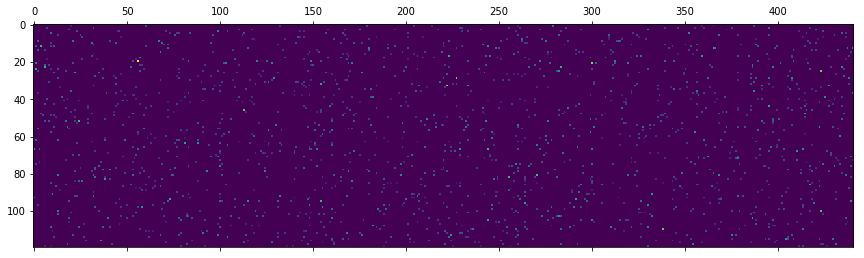

<Figure size 1080x216 with 0 Axes>

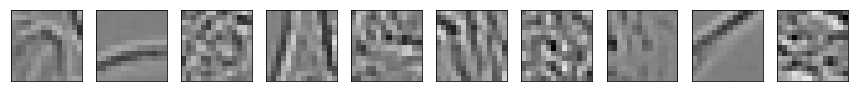

number of codes, size of reconstructed images =  (4096, 196)


<Figure size 1080x216 with 0 Axes>

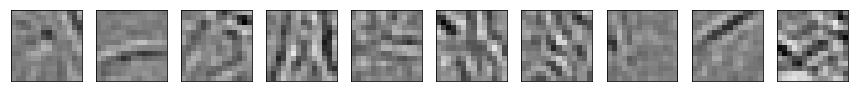

<Figure size 1080x216 with 0 Axes>

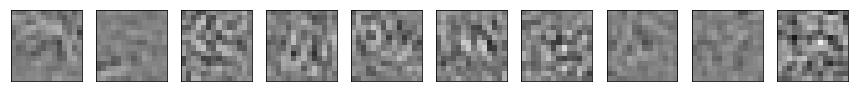

average of data patches =  0.0001237397515007386 +/- 0.01327537223430885
average of residual patches =  -0.0013242128255349175 +/- 0.010240649972039627
median energy of data =  0.3230099078248668
average energy of data =  0.318417503293155 +/- 0.08952987767735905
average error =  -0.0013242128255349175 +/- 0.22945353152134557
average energy of residual =  0.21908059818141698 +/- 0.06822292992606627
median energy of residual =  0.2220656344115596
average gain of coding =  1.4799924371485056 +/- 0.20268742897971914
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.03310729275278402
average std of codewords =  0.20581514398593526
l0-sparseness of codewords =  0.031575520833333336
std of the average of individual patches =  0.012989305487477756


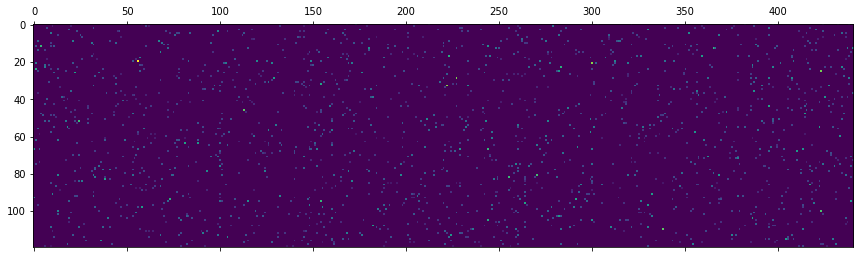

<Figure size 1080x216 with 0 Axes>

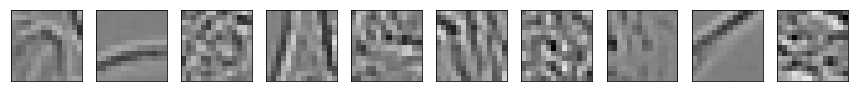

number of codes, size of reconstructed images =  (4096, 196)


<Figure size 1080x216 with 0 Axes>

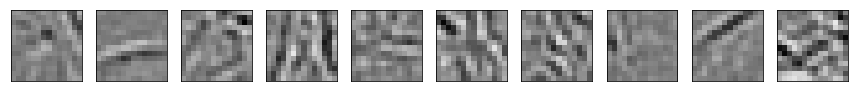

<Figure size 1080x216 with 0 Axes>

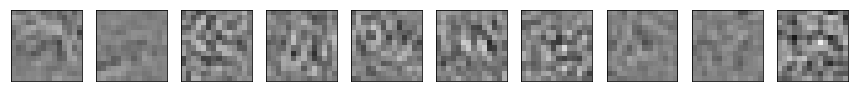

average of data patches =  0.0001237397515007386 +/- 0.01327537223430885
average of residual patches =  -0.001351692560368265 +/- 0.010217074426636639
median energy of data =  0.3230099078248668
average energy of data =  0.318417503293155 +/- 0.08952987767735905
average error =  -0.001351692560368265 +/- 0.22704062077359488
average energy of residual =  0.2171649019755614 +/- 0.06624708222995095
median energy of residual =  0.22146619787806848
average gain of coding =  1.4898234826951797 +/- 0.1959636646464639
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.0224029666968713
average std of codewords =  0.17333238225300893
l0-sparseness of codewords =  0.027626643105158732
std of the average of individual patches =  0.03245504807515263


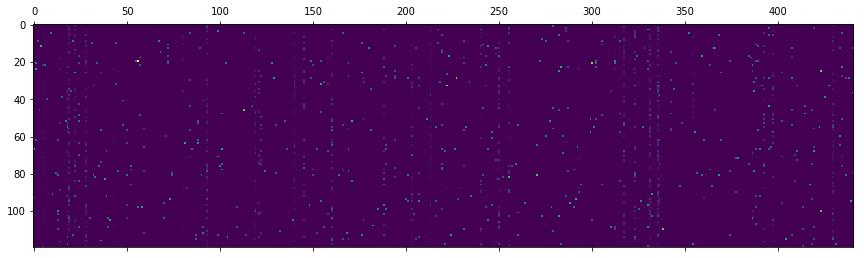

<Figure size 1080x216 with 0 Axes>

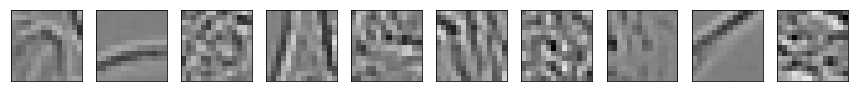

number of codes, size of reconstructed images =  (4096, 196)


<Figure size 1080x216 with 0 Axes>

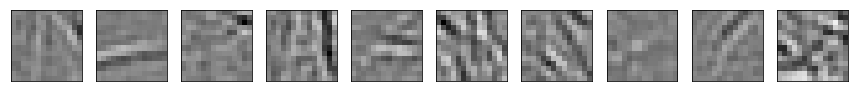

<Figure size 1080x216 with 0 Axes>

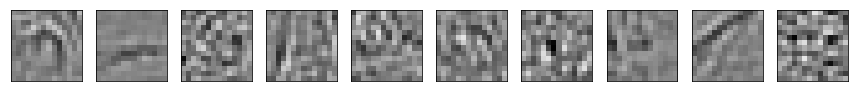

average of data patches =  0.0001237397515007386 +/- 0.01327537223430885
average of residual patches =  -0.0013399392340853109 +/- 0.011048548908898047
median energy of data =  0.3230099078248668
average energy of data =  0.318417503293155 +/- 0.08952987767735905
average error =  -0.0013399392340853109 +/- 0.2569456539412045
average energy of residual =  0.24881943805116455 +/- 0.06412294257383228
median energy of residual =  0.25408450351745737
average gain of coding =  1.2823125929438195 +/- 0.1822186962857282


In [8]:
np.random.seed(1973)
#sparse_code = shl.code(data, dico_, matname=matname)
P_cum_zeroeffect = np.linspace(0, 1, shl.nb_quant, endpoint=True)[np.newaxis, :] * np.ones((shl.n_dictionary, 1))
#P_cum = dico_.P_cum
#P_cum = None
#l0_sparseness = 150
l0_sparseness = shl.l0_sparseness


from shl_scripts.shl_tools import show_data, print_stats
coding_gain = {}
for homeo_method in homeo_methods:
    coding_gain[homeo_method] = {}
    print(33*'🐶')
    print(15*'🐶' + homeo_method[:3] + 15*'🐶')
    print(33*'🐶')

    from shl_scripts.shl_encode import mp
    labels = ['Non', 'One', 'Hom']
    for P_cum, gain, label in zip([None, P_cum_zeroeffect, dico[homeo_method].P_cum], [np.ones(shl.n_dictionary), None, None], labels):
        sparse_code = mp(data[indx, :], dico[homeo_method].dictionary, precision=dico[homeo_method].precision, l0_sparseness=l0_sparseness, P_cum=P_cum, gain=gain)
        SD, SE = print_stats(data[indx, :], dico[homeo_method].dictionary, sparse_code)
        coding_gain[homeo_method][label] = (SD/SE).mean()


In [9]:
coding_gain

{'None': {'Non': 1.4697395932960946,
  'One': 1.480034052559946,
  'Hom': 1.0412594818668246},
 'HAP': {'Non': 1.4758563118003187,
  'One': 1.4879765407268715,
  'Hom': 1.0473407580185974},
 'HEH': {'Non': 1.4799924371485056,
  'One': 1.4898234826951797,
  'Hom': 1.2823125929438195}}

## Version used

In [10]:
%load_ext version_information
%version_information shl_scripts, numpy, shl_scripts, pandas, matplotlib

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython 6.5.0
OS Darwin 17.7.0 x86_64 i386 64bit
shl_scripts 20171221
numpy 1.15.1
shl_scripts 20171221
pandas 0.23.4
matplotlib 3.0.0
Tue Sep 25 11:33:20 2018 CEST